<a href="https://colab.research.google.com/github/sivaram-m-2003/Assignment/blob/main/Sivaram_M_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

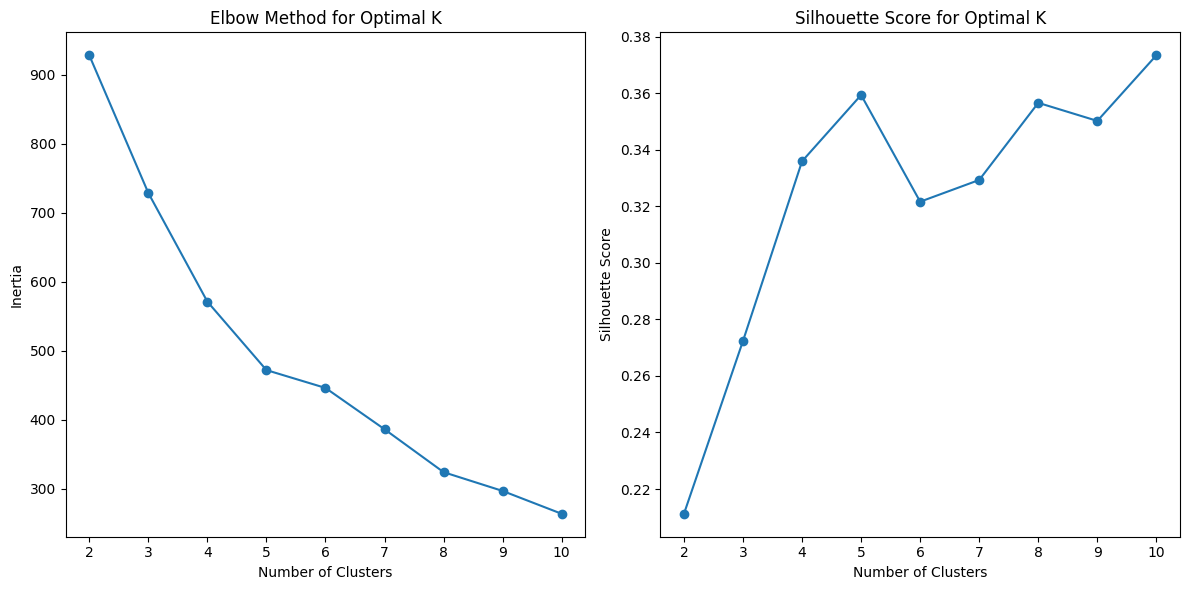

Davies-Bouldin Index: 1.1181164026965122


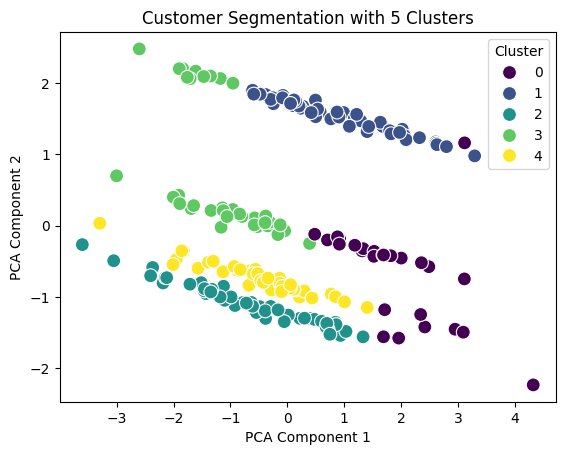

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

merged = transactions.merge(customers, on="CustomerID")

customer_data = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': 'first'
}).reset_index()

customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data.iloc[:, 1:])

inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=customer_data['Cluster'], palette='viridis', s=100
)
plt.title(f'Customer Segmentation with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

customer_data.to_csv("Customer_Segmentation.csv", index=False)
